# SIG742 Assessment 2
## Group Details
- **Pranav kumar | StudentId: 224901774**
- **Parul Bhugra | StudentId: <>**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1200)

# PART-1
- The (transactionrecord.zip) data used for this part could be found in here. You will need to use spark to read the unzipped (csv) data for starting. You could find the code on reading csv data with Spark from M04G.


In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Set up pyspark
#update local version of the package catalog
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.3.3
!wget -q https://archive.apache.org/dist/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz
# unzip it
!tar xf spark-3.3.3-bin-hadoop3.tgz
# install findspark
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.3-bin-hadoop3"

import findspark
findspark.init()

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 3s (83.1 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to pro

In [ ]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
sqlContext

In [ ]:
# Load the csv data as spark dataframe
sdf = sqlContext.read.csv('/content/drive/MyDrive/SIG742/transactionrecord.csv', header=True, inferSchema=True)
sdf.show(5, truncate=False)

+-------------+---------+---------+-----------------------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|Date     |ProductNo|ProductName                        |Product_category|Price|Quantity|CustomerNo|Country       |
+-------------+---------+---------+-----------------------------------+----------------+-----+--------+----------+--------------+
|581482       |12/9/2019|22485    |Set Of 2 Wooden Market Crates      |0ca             |21.47|12      |17490     |United Kingdom|
|581475       |12/9/2019|22596    |Christmas Star Wish List Chalkboard|0ca             |10.65|36      |13069     |United Kingdom|
|581475       |12/9/2019|23235    |Storage Tin Vintage Leaf           |0ca             |11.53|12      |13069     |United Kingdom|
|581475       |12/9/2019|23272    |Tree T-Light Holder Willie Winkie  |0ca             |10.65|12      |13069     |United Kingdom|
|581475       |12/9/2019|23239    |Set Of 4 Knick Knack Tins Poppies  |0ca             |11

In [ ]:
# Print schema of the dataframe
sdf.printSchema()

root
 |-- TransactionNo: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- ProductNo: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Product_category: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- CustomerNo: integer (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
# Print the number of rows in the dataframe
print(f"Number of rows: {sdf.count()}")

Number of rows: 536350


In [ ]:
from pyspark.sql.functions import regexp_replace, date_format, to_date
# Replace '-' with '/' and convert to datetime format
sdf = sdf.withColumn('Date', regexp_replace('Date', '-', '/'))
sdf = sdf.withColumn('Date', date_format(to_date('Date', 'M/d/yyyy'), 'MM/dd/yyyy'))

In [ ]:
# Print schema of the dataframe
sdf.printSchema()

root
 |-- TransactionNo: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- ProductNo: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Product_category: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- CustomerNo: integer (nullable = true)
 |-- Country: string (nullable = true)



In [ ]:
sdf.show(5, truncate=False)

+-------------+----------+---------+-----------------------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|Date      |ProductNo|ProductName                        |Product_category|Price|Quantity|CustomerNo|Country       |
+-------------+----------+---------+-----------------------------------+----------------+-----+--------+----------+--------------+
|581482       |12/09/2019|22485    |Set Of 2 Wooden Market Crates      |0ca             |21.47|12      |17490     |United Kingdom|
|581475       |12/09/2019|22596    |Christmas Star Wish List Chalkboard|0ca             |10.65|36      |13069     |United Kingdom|
|581475       |12/09/2019|23235    |Storage Tin Vintage Leaf           |0ca             |11.53|12      |13069     |United Kingdom|
|581475       |12/09/2019|23272    |Tree T-Light Holder Willie Winkie  |0ca             |10.65|12      |13069     |United Kingdom|
|581475       |12/09/2019|23239    |Set Of 4 Knick Knack Tins Poppies  |0ca        

In [ ]:
sdf.show(5, truncate=False)

+-------------+----------+---------+-----------------------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|Date      |ProductNo|ProductName                        |Product_category|Price|Quantity|CustomerNo|Country       |
+-------------+----------+---------+-----------------------------------+----------------+-----+--------+----------+--------------+
|581482       |12/09/2019|22485    |Set Of 2 Wooden Market Crates      |0ca             |21.47|12      |17490     |United Kingdom|
|581475       |12/09/2019|22596    |Christmas Star Wish List Chalkboard|0ca             |10.65|36      |13069     |United Kingdom|
|581475       |12/09/2019|23235    |Storage Tin Vintage Leaf           |0ca             |11.53|12      |13069     |United Kingdom|
|581475       |12/09/2019|23272    |Tree T-Light Holder Willie Winkie  |0ca             |10.65|12      |13069     |United Kingdom|
|581475       |12/09/2019|23239    |Set Of 4 Knick Knack Tins Poppies  |0ca        

In [ ]:
from pyspark.sql.functions import col, isnan, when, count

# Count missing values per column
sdf.select([count(when(col(c).isNull(), c)).alias(c) for c in sdf.columns]).show()

+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|TransactionNo|Date|ProductNo|ProductName|Product_category|Price|Quantity|CustomerNo|Country|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+
|            0|   0|        0|          0|               0|    0|       0|         0|      0|
+-------------+----+---------+-----------+----------------+-----+--------+----------+-------+



In [ ]:
# Identify duplicate rows based on all columns
duplicate_rows = sdf.groupBy(sdf.columns).count().filter("count > 1")

# Show count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.count()}")

# Show a 5 duplicate rows
duplicate_rows.show(5, truncate=False)

Number of duplicate rows: 4794
+-------------+----------+---------+---------------------------------+----------------+-----+--------+----------+--------------+-----+
|TransactionNo|Date      |ProductNo|ProductName                      |Product_category|Price|Quantity|CustomerNo|Country       |count|
+-------------+----------+---------+---------------------------------+----------------+-----+--------+----------+--------------+-----+
|580720       |12/05/2019|23439    |Hand Warmer Red Love Heart       |0ca             |6.13 |1       |14629     |United Kingdom|2    |
|580305       |12/02/2019|23084    |Rabbit Night Light               |0ca             |6.19 |4       |12970     |United Kingdom|2    |
|578676       |11/24/2019|22556    |Plasters In Tin Circus Parade    |0ca             |6.19 |1       |16016     |United Kingdom|2    |
|575886       |11/11/2019|21355    |Toast Its - I Love You           |0ca             |11.53|1       |12517     |Germany       |2    |
|575904       |11/11/201

In [ ]:
sdf.filter(sdf.TransactionNo=='580958').show(100, truncate=False)

+-------------+----------+---------+---------------------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|Date      |ProductNo|ProductName                      |Product_category|Price|Quantity|CustomerNo|Country       |
+-------------+----------+---------+---------------------------------+----------------+-----+--------+----------+--------------+
|580958       |12/06/2019|22597    |Musical Zinc Heart Decoration    |0ca             |6.19 |1       |17266     |United Kingdom|
|580958       |12/06/2019|22335    |Heart Decoration Painted Zinc    |0ca             |6.19 |7       |17266     |United Kingdom|
|580958       |12/06/2019|23334    |Ivory Wicker Heart Small         |0ca             |6.19 |1       |17266     |United Kingdom|
|580958       |12/06/2019|23333    |Ivory Wicker Heart Medium        |0ca             |6.19 |1       |17266     |United Kingdom|
|580958       |12/06/2019|23332    |Ivory Wicker Heart Large         |0ca             |6.19 |1   

**Investigating Duplicate Rows**

|TransactionNo|Date               |ProductNo|ProductName                      |Product_category|Price|Quantity|CustomerNo|Country    
|--------|--------|---------|-----------|--------|-----|--------|------|------|
|580958       |2019-12-06 00:00:00|23333    |Ivory Wicker Heart Medium        |0ca             |6.19 |1       |17266     |United Kingdom|
|580958       |2019-12-06 00:00:00|23333    |Ivory Wicker Heart Medium        |0ca             |6.19 |2       |17266     |United Kingdom|
|580958       |2019-12-06 00:00:00|23333    |Ivory Wicker Heart Medium        |0ca             |6.19 |4       |17266     |United Kingdom|
|580958       |2019-12-06 00:00:00|23333    |Ivory Wicker Heart Medium        |0ca             |6.19 |1       |17266     |United Kingdom|

- Assuming these are valid records and need merging together with aggregated quantity for group by on TransactionNo and ProductNo.
- For duplicates based on TransactionNo and ProductNo, update the quantity of the first row and remove the others.

In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import sum as spark_sum

# Window specification for grouping by TransactionNo and ProductNo
window_spec = Window.partitionBy("TransactionNo", "ProductNo").orderBy("TransactionNo")

# Sum Quantity for each group
sdf = sdf.withColumn("Quantity", spark_sum("Quantity").over(window_spec))

# Remove duplicates by keeping the first occurrence
sdf = sdf.dropDuplicates(["TransactionNo", "ProductNo"])

In [ ]:
# Identify duplicate rows based on all columns
duplicate_rows = sdf.groupBy(sdf.columns).count().filter("count > 1")

# Show count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.count()}")

Number of duplicate rows: 0


In [ ]:
# Generate descriptive statistics
sdf.describe().show()

+-------+-----------------+----------+------------------+--------------------+----------------+------------------+------------------+------------------+-----------+
|summary|    TransactionNo|      Date|         ProductNo|         ProductName|Product_category|             Price|          Quantity|        CustomerNo|    Country|
+-------+-----------------+----------+------------------+--------------------+----------------+------------------+------------------+------------------+-----------+
|  count|           525367|    525367|            525367|              525367|          525367|            525367|            525367|            525367|     525367|
|   mean| 559925.369441811|      null|27509.541302350335|                null|            null|12.686804081715973|10.126715229544299|15216.383442431672|       null|
| stddev|13408.02502102728|      null|16633.567813673297|                null|            null| 8.564729070220398|218.95808336080017| 1723.670643435134|       null|
|    min| 

*Observations on descriptive statistics*
- Quantity can be negative and sample shows its coming from TransactionNo = `C581569`
  - So there seems to be atleast two types of TransactionNos:
    - 6 digit numbers like - `525367`.
    - Starts with 'C' followed by 6 digit numbers like - `C581569`.
- CustomerNo can be negative as shown by min value i.e `-1`.
- ProductName can have non-alphabets characters like = ", space etc.
- Price values ranges from `5.13` to `660.62` with mean as `12.68`
- Country have value of `Unspecified`.

In [ ]:
ProductName_unique_values = sdf.select("ProductName").distinct()
ProductName_unique_values.count()

3768

In [ ]:
ProductName_unique_values.sort("ProductName").show(5, truncate=False)

+---------------------------------------------+
|ProductName                                  |
+---------------------------------------------+
|"""Assorted Flower Colour """"Leis"""""""    |
|"""Charlie+Lola""""Extremely Busy"""" Sign"""|
|"""Flower Glass Garland Neckl36""""Black"""  |
|"""Flower Glass Garland Neckl36""""Blue"""   |
|"""Flower Glass Garland Neckl36""""Green"""  |
+---------------------------------------------+
only showing top 5 rows



In [ ]:
Product_category_unique_values = sdf.select("Product_category").distinct()
Product_category_unique_values.count()

5

In [ ]:
Product_category_unique_values.sort("Product_category").show(5, truncate=False)

+----------------+
|Product_category|
+----------------+
|0ca             |
|1ca             |
|2ca             |
|3ca             |
|4ca             |
+----------------+



In [ ]:
# Get unique values from the 'TransactionNo' column
Country_unique_values = sdf.select("Country").distinct()

Country_unique_values.count()

38

In [ ]:
Country_unique_values.sort("Country").show(40, truncate=False)

+--------------------+
|Country             |
+--------------------+
|Australia           |
|Austria             |
|Bahrain             |
|Belgium             |
|Brazil              |
|Canada              |
|Channel Islands     |
|Cyprus              |
|Czech Republic      |
|Denmark             |
|EIRE                |
|European Community  |
|Finland             |
|France              |
|Germany             |
|Greece              |
|Hong Kong           |
|Iceland             |
|Israel              |
|Italy               |
|Japan               |
|Lebanon             |
|Lithuania           |
|Malta               |
|Netherlands         |
|Norway              |
|Poland              |
|Portugal            |
|RSA                 |
|Saudi Arabia        |
|Singapore           |
|Spain               |
|Sweden              |
|Switzerland         |
|USA                 |
|United Arab Emirates|
|United Kingdom      |
|Unspecified         |
+--------------------+



In [ ]:
print(f"Rows with Country=='Unspecified' {sdf.filter(sdf.Country=='Unspecified').count()}")

Rows with Country=='Unspecified' 434


In [ ]:
sdf.filter(sdf.Country == 'Unspecified').select("CustomerNo").distinct().show()

+----------+
|CustomerNo|
+----------+
|     12743|
|     13857|
|     12363|
|     17303|
|     16320|
|     16521|
|     14265|
+----------+



- Now we have processed data in spark dataframe- `sdf` with:
  - Cleaned and formatted Date column values as `mm\dd\yyyy`.
  - Applied/Inferred appropiate types for each columns.
  - Verified there are no missing values as nulls.
  - Eliminated the duplicate enteries.
  - Check unique values for Columns - [`ProductName`, `Product_Category`, `Country`]

## Question 1.1


**Using PySpark to do some of the data wrangling process, so that:**
### 1.1.1 For the ’NA’ in CustomerNo columns, change it to ’-1’.


In [ ]:
# Replace 'NA' with '-1'
sdf = sdf.withColumn("CustomerNo", when(col("CustomerNo") == 'NA', '-1').otherwise(col("CustomerNo")))

### 1.1.2 Process the text in productName column, only alphabet characters left, and save the processed result to a new column productName_process and show the first 5 rows.

In [ ]:
# Create a new column with only alphabetic characters
sdf = sdf.withColumn("productName_process", regexp_replace(col("ProductName"), "[^a-zA-Z]", ""))

# Show the first 5 rows
sdf.select("productName_process").show(5)

+--------------------+
| productName_process|
+--------------------+
|GlassStarFrostedT...|
|RedWoollyHottieWh...|
|CreamCupidHeartsC...|
|HandWarmerRedRetr...|
|HomeBuildingBlock...|
+--------------------+
only showing top 5 rows



## Question 1.2

**Find out the revenue on each transaction date. In order to achieve the above, some wrangling work is required to be done:**
### 1.2.1 Using pyspark to calculate the revenue (price * Quantity) and save as float format in pyspark dataframe to show the top 5 rows.

In [ ]:
from pyspark.sql.functions import expr

# Calculate revenue and cast to float
sdf = sdf.withColumn("Revenue", expr("cast(Price * Quantity as float)"))

# Show top 5 rows
sdf.select("Revenue").show(5)

+-------+
|Revenue|
+-------+
|  87.66|
|  82.32|
| 104.56|
|   72.9|
|  49.05|
+-------+
only showing top 5 rows



### 1.2.2 Transform the pyspark dataframe to pandas dataframe (named as df) and create the column transaction_date with date format according to Date. Print your df pandas dataframe with top 5 rows after creating the column transaction_date.

In [ ]:
# Convert to pandas DataFrame
df_pandas = sdf.toPandas()

In [ ]:
df_pandas.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue
0,536365,12/01/2018,21730,Glass Star Frosted T-Light Holder,0ca,14.61,6,17850,United Kingdom,GlassStarFrostedTLightHolder,87.660004
1,536365,12/01/2018,84029E,Red Woolly Hottie White Heart,0ca,13.72,6,17850,United Kingdom,RedWoollyHottieWhiteHeart,82.320000
2,536365,12/01/2018,84406B,Cream Cupid Hearts Coat Hanger,0ca,13.07,8,17850,United Kingdom,CreamCupidHeartsCoatHanger,104.559998
3,536366,12/01/2018,22632,Hand Warmer Red Retrospot,0ca,12.15,6,17850,United Kingdom,HandWarmerRedRetrospot,72.900002
4,536367,12/01/2018,21754,Home Building Block Word,0ca,16.35,3,13047,United Kingdom,HomeBuildingBlockWord,49.049999


In [ ]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525367 entries, 0 to 525366
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionNo        525367 non-null  object 
 1   Date                 525367 non-null  object 
 2   ProductNo            525367 non-null  object 
 3   ProductName          525367 non-null  object 
 4   Product_category     525367 non-null  object 
 5   Price                525367 non-null  float64
 6   Quantity             525367 non-null  int64  
 7   CustomerNo           525367 non-null  object 
 8   Country              525367 non-null  object 
 9   productName_process  525367 non-null  object 
 10  Revenue              525367 non-null  float32
dtypes: float32(1), float64(1), int64(1), object(8)
memory usage: 42.1+ MB


In [ ]:
# Add transaction_date column by converting the Date column
df_pandas['transaction_date'] = pd.to_datetime(df_pandas['Date'])

# Show top 5 rows of pandas dataframe
print(df_pandas.head(5))

  TransactionNo        Date ProductNo                        ProductName Product_category  Price  Quantity CustomerNo         Country           productName_process     Revenue transaction_date
0        536365  12/01/2018     21730  Glass Star Frosted T-Light Holder              0ca  14.61         6      17850  United Kingdom  GlassStarFrostedTLightHolder   87.660004       2018-12-01
1        536365  12/01/2018    84029E      Red Woolly Hottie White Heart              0ca  13.72         6      17850  United Kingdom     RedWoollyHottieWhiteHeart   82.320000       2018-12-01
2        536365  12/01/2018    84406B     Cream Cupid Hearts Coat Hanger              0ca  13.07         8      17850  United Kingdom    CreamCupidHeartsCoatHanger  104.559998       2018-12-01
3        536366  12/01/2018     22632          Hand Warmer Red Retrospot              0ca  12.15         6      17850  United Kingdom        HandWarmerRedRetrospot   72.900002       2018-12-01
4        536367  12/01/2018     217

In [ ]:
# Group by transaction_date and sum the revenue
df_pandas_revenue = df_pandas.groupby('transaction_date')['Revenue'].sum().reset_index()
df_pandas_revenue.head()

,transaction_date,Revenue
0,2018-12-01,324660.375000
1,2018-12-02,260301.656250
2,2018-12-03,202060.515625
3,2018-12-05,196631.218750
4,2018-12-06,271115.812500


### 1.2.3 Plot the sum of revenue on transaction_date in a line plot and find out any immediate pattern / insight?

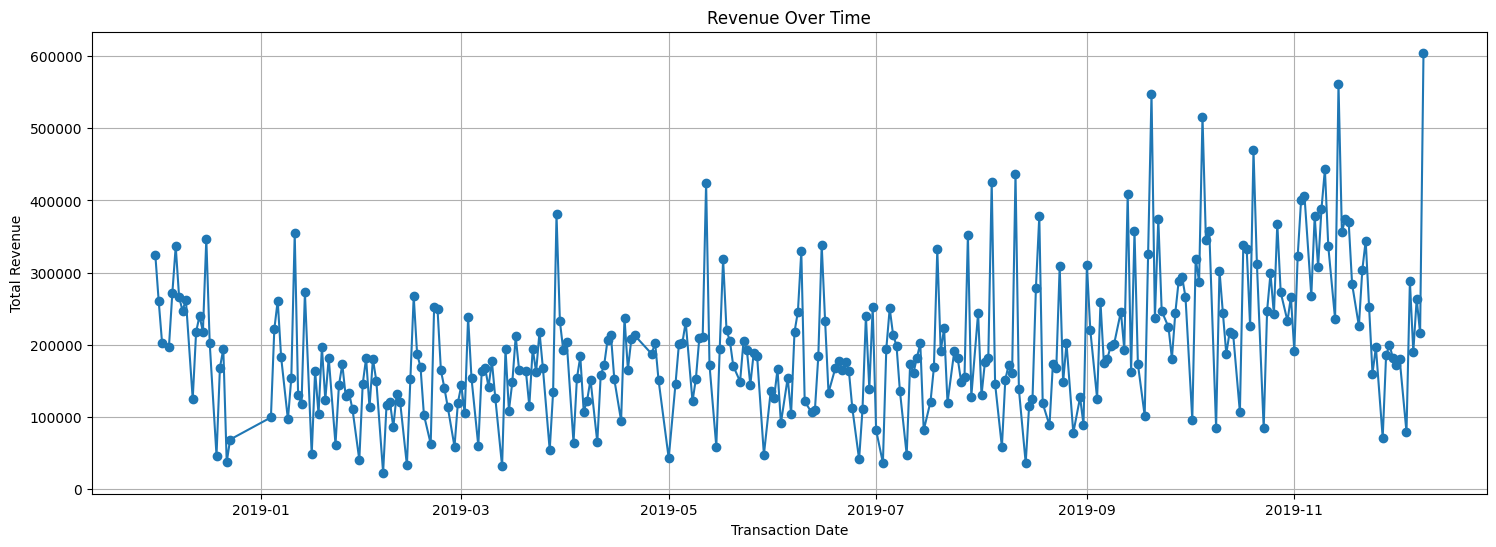

In [ ]:
# Plot the line chart
plt.figure(figsize=(18, 6))
plt.plot(df_pandas_revenue['transaction_date'], df_pandas_revenue['Revenue'], marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

From the above plot here are a few immediate insights:

- Consistent Activity: There is consistent transaction activity throughout the period from 2018-12 to 2019-12, indicating regular business operations.
- Revenue Variability: The total revenue shows significant variability over time, with some periods having much higher revenue than others. This could suggest seasonal trends, promotional events, or other factors influencing revenue.
- Spikes/Outliers: There are several outliers with particularly high revenue values compared to the majority of data points. These could be due to large transactions or special events.
- No Clear Monthly Trend: There doesn’t appear to be a clear upward or downward trend in revenue over the observed period. The revenue fluctuates without a consistent pattern.

## Question 1.3


### 1.3.1 Determine which workday (day of the week), generates the most sales (plotting the results in a line chart with workday on averaged revenues).

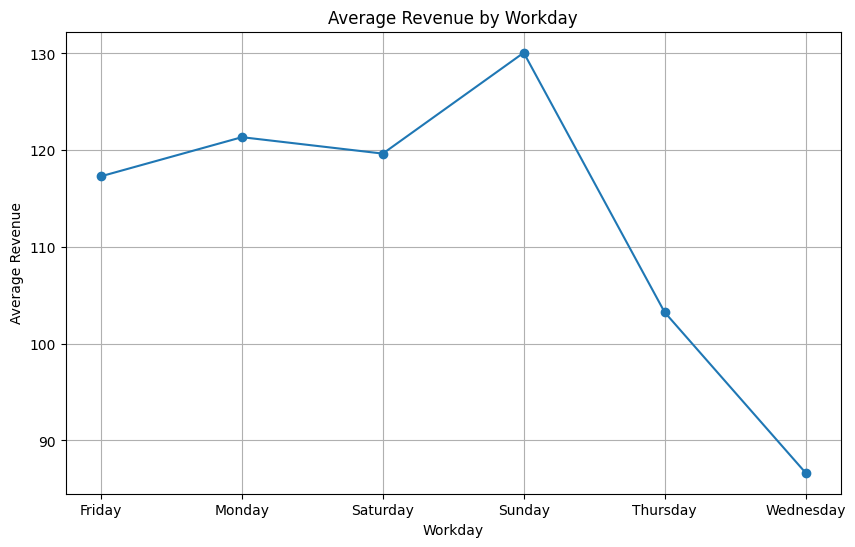

Workday with the most sales: Sunday


In [ ]:
# Add column for day of the week
df_pandas['workday'] = df_pandas['transaction_date'].dt.day_name()

# Group by workday and calculate the average revenue
df_pandas_workday = df_pandas.groupby('workday')['Revenue'].mean().reset_index()

# Plot workday vs. average revenue
plt.figure(figsize=(10, 6))
plt.plot(df_pandas_workday['workday'], df_pandas_workday['Revenue'], marker='o')
plt.title('Average Revenue by Workday')
plt.xlabel('Workday')
plt.ylabel('Average Revenue')
plt.grid(True)
plt.show()

# Find the workday with the highest revenue
most_sales_workday = df_pandas_workday.loc[df_pandas_workday['Revenue'].idxmax()]['workday']
print(f"Workday with the most sales: {most_sales_workday}")

### 1.3.2 Identify the name of product (column productName_process) that contributes the highest revenue on ‘that workday’ (you need to find out from 1.3.1) and the name of product (column productName_process) that has the highest sales volume (sum of the Quantity), no need to remove negative quantity transactions.) on ‘that workday’ (you need to find out from 1.3.1).

In [ ]:
# Filter data for the workday with the most sales
df_pandas_filtered = df_pandas[df_pandas['workday'] == most_sales_workday]

# Group by productName_process and calculate the sum of revenue and quantity
df_pandas_product = df_pandas_filtered.groupby('productName_process').agg(
    total_revenue=('Revenue', 'sum'),
    total_quantity=('Quantity', 'sum')
).reset_index()

# Find the product with the highest revenue
top_product_revenue = df_pandas_product.loc[df_pandas_product['total_revenue'].idxmax()]['productName_process']
print(f"Product with the highest revenue on {most_sales_workday}: {top_product_revenue}")

# Find the product with the highest sales volume
top_product_quantity = df_pandas_product.loc[df_pandas_product['total_quantity'].idxmax()]['productName_process']
print(f"Product with the highest sales volume on {most_sales_workday}: {top_product_quantity}")


Product with the highest revenue on Sunday: WorldWarGlidersAsstdDesigns
Product with the highest sales volume on Sunday: WorldWarGlidersAsstdDesigns


### 1.3.3 Please provide two plots showing the top 5 products that contribute the highest revenues in general and top 5 products that have the highest sales volumes in general.


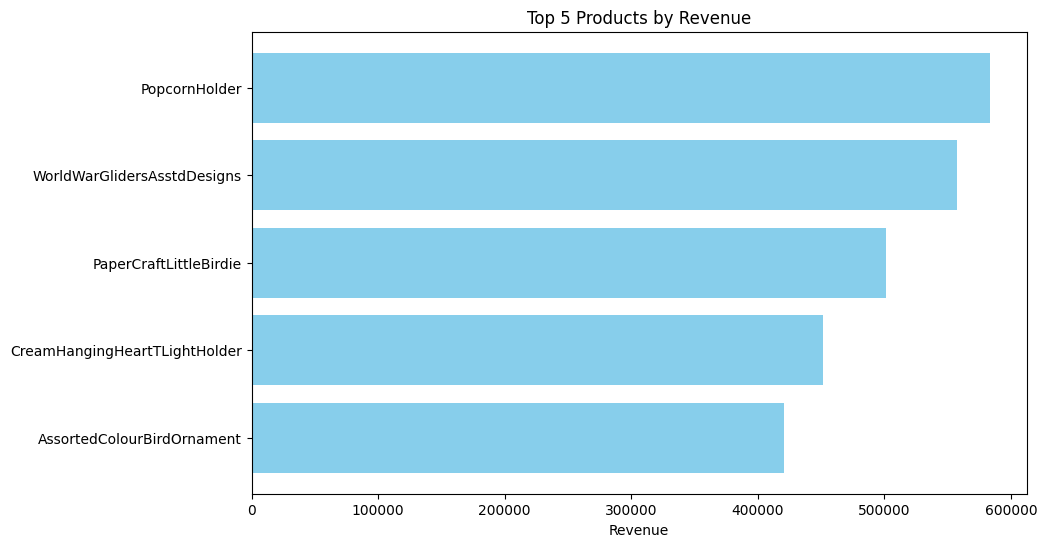

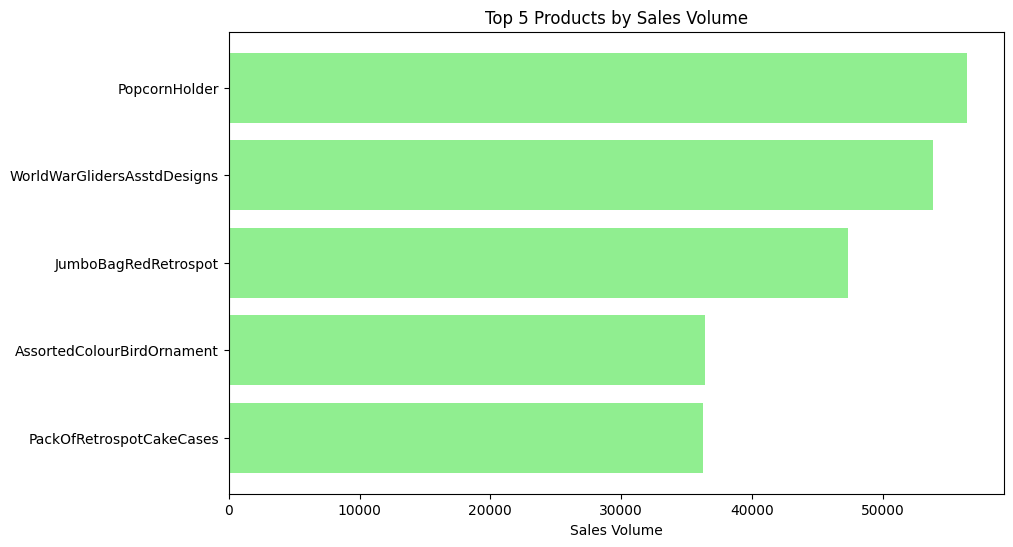

In [ ]:
# Aggregate revenue and sales volume by product
product_revenue = df_pandas.groupby('productName_process')['Revenue'].sum().reset_index()
product_volume = df_pandas.groupby('productName_process')['Quantity'].sum().reset_index()

# Get top 5 products by revenue
top_5_revenue = product_revenue.sort_values(by='Revenue', ascending=False).head(5)

# Get top 5 products by sales volume
top_5_volume = product_volume.sort_values(by='Quantity', ascending=False).head(5)

# Plot the top 5 products by revenue
plt.figure(figsize=(10, 6))
plt.barh(top_5_revenue['productName_process'], top_5_revenue['Revenue'], color='skyblue')
plt.xlabel('Revenue')
plt.title('Top 5 Products by Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()

# Plot the top 5 products by sales volume
plt.figure(figsize=(10, 6))
plt.barh(top_5_volume['productName_process'], top_5_volume['Quantity'], color='lightgreen')
plt.xlabel('Sales Volume')
plt.title('Top 5 Products by Sales Volume')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest value at the top
plt.show()

## Question 1.4
### Which country generates the highest revenue? Additionally, identify the month in that country that has the highest revenue.

In [ ]:
# Group by Country to calculate total revenue per country
country_revenue = df_pandas.groupby('Country')['Revenue'].sum().reset_index()

# Find the country with the highest revenue
top_country = country_revenue.sort_values(by='Revenue', ascending=False).iloc[0]['Country']

print(f"The country that generates the highest revenue is: {top_country}")

# Filter data for the top country
df_top_country = df_pandas[df_pandas['Country'] == top_country]

# Extract the month from the Date column (assuming Date is in datetime format)
df_top_country['Month'] = pd.to_datetime(df_top_country['Date']).dt.to_period('M')

# Group by Month to calculate total revenue per month in the top country
month_revenue = df_top_country.groupby('Month')['Revenue'].sum().reset_index()

# Find the month with the highest revenue
top_month = month_revenue.sort_values(by='Revenue', ascending=False).iloc[0]['Month']

print(f"The month with the highest revenue in {top_country} is: {top_month}")

The country that generates the highest revenue is: United Kingdom
The month with the highest revenue in United Kingdom is: 2019-11


## Question 1.5
### Let’s do some analysis on the CustomerNo and their transactions. Determine the shopping frequency of customers to identify who shops most frequently (find out the highest distinct count of transactionNo on customer level, be careful with those transactions that is not for shopping – filter those transaction quantity <= 0). Also, find out what products (column productName_process) ‘this customer’ typically buys based on the Quantity of products purchased.

In [ ]:
# Filter out transactions where Quantity <= 0 (non-shopping transactions)
df_shopping_transactions = df_pandas[df_pandas['Quantity'] > 0]

# Group by CustomerNo and calculate the distinct count of TransactionNo (shopping frequency)
customer_frequency = df_shopping_transactions.groupby('CustomerNo')['TransactionNo'].nunique().reset_index()
customer_frequency.columns = ['CustomerNo', 'TransactionCount']

# Find the customer with the highest distinct transaction count (most frequent shopper)
most_frequent_customer = customer_frequency.sort_values(by='TransactionCount', ascending=False).iloc[0]['CustomerNo']

print(f"The customer who shops most frequently is: {most_frequent_customer}")

# Filter data for this customer
df_most_frequent_customer = df_shopping_transactions[df_shopping_transactions['CustomerNo'] == most_frequent_customer]

# Group by ProductName_process to find the total quantity of each product this customer buys
products_bought = df_most_frequent_customer.groupby('productName_process')['Quantity'].sum().reset_index()
products_bought = products_bought.sort_values(by='Quantity', ascending=False)

# Print the products and quantities
print(f"Products typically bought by customer {most_frequent_customer} based on quantity:")
print(products_bought)

# Optionally, you can print the top 5 most frequently bought products
print("Top 5 most frequently bought products:")
print(products_bought.head(5))

The customer who shops most frequently is: 12748
Products typically bought by customer 12748 based on quantity:
                productName_process  Quantity
1609   VictorianMetalPostcardSpring       595
1706    WorldWarGlidersAsstdDesigns       480
1273  RoseScentCandleJewelledDrawer       408
201         CartoonPencilSharpeners       405
1483    SmallWhiteRetrospotMugInBox       390
...                             ...       ...
989                PantryAppleCorer         1
507           FrenchCarriageLantern         1
508       FrenchChateauLargePlatter         1
986    PairOfPinkFlowerClusterSlide         1
1749      dVintageChristmasStickers         1

[1750 rows x 2 columns]
Top 5 most frequently bought products:
                productName_process  Quantity
1609   VictorianMetalPostcardSpring       595
1706    WorldWarGlidersAsstdDesigns       480
1273  RoseScentCandleJewelledDrawer       408
201         CartoonPencilSharpeners       405
1483    SmallWhiteRetrospotMugInBox       

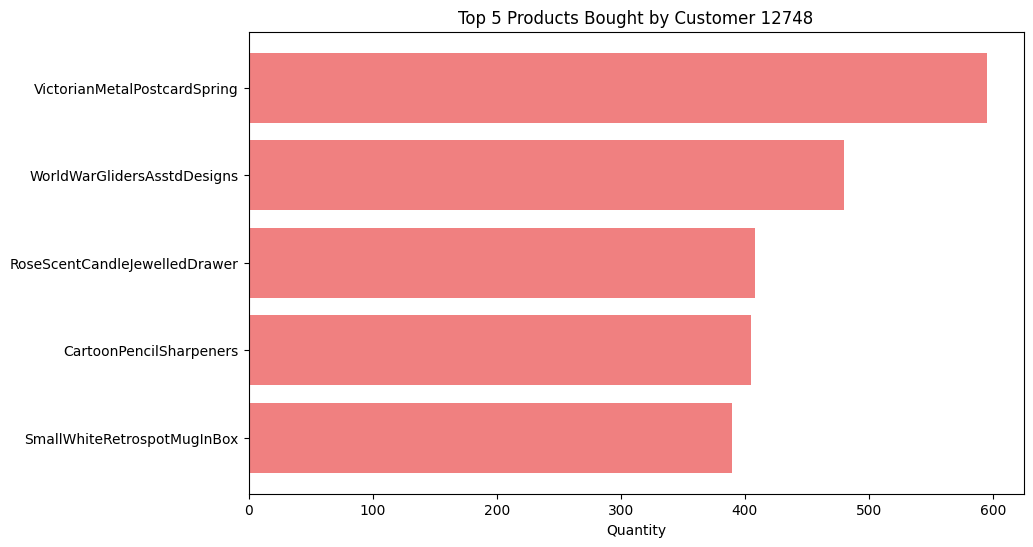

In [ ]:
# Plot the top 5 most frequently bought products
plt.figure(figsize=(10, 6))
plt.barh(products_bought['productName_process'].head(5), products_bought['Quantity'].head(5), color='lightcoral')
plt.xlabel('Quantity')
plt.title(f"Top 5 Products Bought by Customer {most_frequent_customer}")
plt.gca().invert_yaxis()  # Invert y-axis to show highest values at the top
plt.show()

## Question 1.6
**As the data scientist, you would like to build a basket-level analysis on the product customer buying (filter the ‘df’ dataframe with df[’Quantity’]>0). In this task, you need to:**
### 1.6.1 Group by the transactionNo and aggregate the category of product (column product_category) into list on transactionNo level. Similarly, group and aggregate name of product (column productName_process) into list on transactionNo level.

In [ ]:
# Group by TransactionNo and aggregate product_category and productName_process into lists
aggregated_df = df_pandas.groupby('TransactionNo').agg({
    'Product_category': list,          # Aggregate product categories into a list
    'productName_process': list        # Aggregate product names into a list
}).reset_index()

# Show the resulting dataframe with aggregated lists
print(aggregated_df.head())

  TransactionNo                                   Product_category                                productName_process
0        536365                [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca]  [GlassStarFrostedTLightHolder, RedWoollyHottie...
1        536366                                         [0ca, 0ca]      [HandWarmerRedRetrospot, HandWarmerUnionJack]
2        536367  [0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, 0ca, ...  [HomeBuildingBlockWord, LoveBuildingBlockWord,...
3        536368                               [0ca, 0ca, 0ca, 0ca]  [RedCoatRackParisFashion, YellowCoatRackParisF...
4        536369                                              [0ca]                            [BathBuildingBlockWord]


### 1.6.2 Removing duplicates on adjacent elements in the list from product_category you obtained from 1.6.1, such as [product category 1, product category 1, product category 2, ...] will be processed as [product category 1, product category 2,....]. After this processing, there will be no duplicates on on adjacent elements in the list. Please save your processed dataframe as ‘df_1’ and print the top 10 rows.

In [ ]:
# Function to remove adjacent duplicates in a list
def remove_adjacent_duplicates(category_list):
    if not category_list:
        return category_list
    # Initialize with the first element
    result = [category_list[0]]
    # Iterate over the list, adding non-adjacent duplicates
    for item in category_list[1:]:
        if item != result[-1]:
            result.append(item)
    return result

# Assuming 'aggregated_df' is the dataframe obtained from the previous step

# 1. Apply the function to the 'product_category' column
aggregated_df['Product_category'] = aggregated_df['Product_category'].apply(remove_adjacent_duplicates)

# 2. Save the processed DataFrame as df_1
df_1 = aggregated_df.copy()

# 3. Print the top 10 rows of df_1
print(df_1.head(10))

  TransactionNo Product_category                                productName_process
0        536365            [0ca]  [GlassStarFrostedTLightHolder, RedWoollyHottie...
1        536366            [0ca]      [HandWarmerRedRetrospot, HandWarmerUnionJack]
2        536367            [0ca]  [HomeBuildingBlockWord, LoveBuildingBlockWord,...
3        536368            [0ca]  [RedCoatRackParisFashion, YellowCoatRackParisF...
4        536369            [0ca]                            [BathBuildingBlockWord]
5        536370            [0ca]  [SetRedRetrospotTeaTowels, PandaAndBunniesStic...
6        536371            [0ca]                          [PaperChainKitSChristmas]
7        536372            [0ca]      [HandWarmerRedRetrospot, HandWarmerUnionJack]
8        536373            [0ca]  [VintageBillboardLoveHateMug, VintageBillboard...
9        536374            [0ca]                          [VictorianSewingBoxLarge]


## Question 1.7
**Continue work on the results of question 1.6, now for each of the transaction, you will have a list of
product categories. To further conduct the analysis, you need to finish below by using dataframe
‘df_1’:**
### 1.7.1 Create new column prod_len to find out the length of the list from product_category on each transaction. Print the first five rows of dataframe ‘df_1’.

In [ ]:
# Create a new column 'prod_len' which contains the length of the list in 'product_category'
df_1['prod_len'] = df_1['Product_category'].apply(len)

# Print the first 5 rows of the dataframe 'df_1'
print(df_1.head(5))

  TransactionNo Product_category                                productName_process  prod_len
0        536365            [0ca]  [GlassStarFrostedTLightHolder, RedWoollyHottie...         1
1        536366            [0ca]      [HandWarmerRedRetrospot, HandWarmerUnionJack]         1
2        536367            [0ca]  [HomeBuildingBlockWord, LoveBuildingBlockWord,...         1
3        536368            [0ca]  [RedCoatRackParisFashion, YellowCoatRackParisF...         1
4        536369            [0ca]                            [BathBuildingBlockWord]         1


### 1.7.2 Transform the list in product_category from [productcategory1, productcategory2...] to ‘start > productcategory1 > productcategory2 > ... > conversion’ with new column path. You need to add ‘start’ as the first element, and ‘conversion’ as the last. Also you need to use ‘ > ’ to connect each of the transition on products (there is a space between the elements and the transition symbol >). The final format after the transition is given in example as below fig. 2. Define the function data_processing to achieve above with three arguments: df which is the dataframe name, maxlength with default value of 3 for filtering the dataframe with prod_len" <=maxlength and minlength with default value of 1 for filtering the dataframe with prod_len >=minlength. The function data_processing will return the new dataframe ‘df_2’. Run your defined function with dataframe ‘df_1’, maxlength = 5 and minlength = 2, print the dataframe ‘df_2’ with top 10 rows.

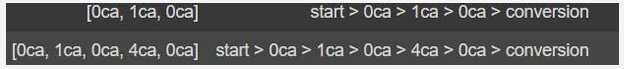

**Figure 2: Example of the transformation on 1.7.2, left column is before the transformation, right column is after the transformation. After transformation, it is not list anymore.**
*Hint: you might consider to use str.replace() syntax from default python 3*

In [ ]:
# Define the data_processing function
def data_processing(df, maxlength=3, minlength=1):
    # Filter the dataframe based on the prod_len column
    df_filtered = df[(df['prod_len'] <= maxlength) & (df['prod_len'] >= minlength)].copy()

    # Define a function to transform the product_category list into the desired path format
    def create_path(product_list):
        # Add 'start' at the beginning and 'conversion' at the end
        product_path = ['start'] + product_list + ['conversion']
        # Join the elements with ' > ' as separator
        return ' > '.join(product_path)

    # Apply the create_path function to each product_category list
    df_filtered['path'] = df_filtered['Product_category'].apply(create_path)

    # Return the new dataframe df_2
    return df_filtered

# Assuming df_1 is the dataframe you're working with

# Run the function with df_1, maxlength = 5, and minlength = 2
df_2 = data_processing(df_1, maxlength=5, minlength=2)

# Print the top 10 rows of the new dataframe df
df_2.head(10)

,TransactionNo,Product_category,productName_process,prod_len,path
13,536378,"[0ca, 1ca, 0ca]","[LunchBagRedRetrospot, SetRedSpottyPaperPlates...",3,start > 0ca > 1ca > 0ca > conversion
27,536395,"[1ca, 0ca]","[PackOfRetrospotCakeCases, SmallGlassHeartTrin...",2,start > 1ca > 0ca > conversion
36,536404,"[0ca, 4ca, 0ca, 1ca, 0ca]","[LunchBagBlackSkull, PartyInvitesSpaceman, Pac...",5,start > 0ca > 4ca > 0ca > 1ca > 0ca > conversion
40,536408,"[0ca, 1ca, 0ca]","[SleepingCatErasers, PackOfRetrospotCakeCases,...",3,start > 0ca > 1ca > 0ca > conversion
42,536412,"[0ca, 4ca, 0ca]","[LunchBagBlackSkull, RedRetrospotMiniCases, Re...",3,start > 0ca > 4ca > 0ca > conversion
43,536415,"[0ca, 1ca, 0ca]","[VintageSnapCards, VintageHeadsAndTailsCardGam...",3,start > 0ca > 1ca > 0ca > conversion
52,536464,"[0ca, 1ca, 0ca]","[SwirlyCircularRubbersInBag, BlueRoseFabricMir...",3,start > 0ca > 1ca > 0ca > conversion
72,536532,"[0ca, 1ca, 0ca]","[DoormatRedRetrospot, SetRedRetrospotPaperNapk...",3,start > 0ca > 1ca > 0ca > conversion
82,536542,"[0ca, 4ca, 0ca]","[JumboBagToys, JumboBagScandinavianBluePaisley...",3,start > 0ca > 4ca > 0ca > conversion
83,536544,"[0ca, 1ca, 0ca, 4ca, 0ca]","[KittyPencilErasers, PartyTimePencilErasers, B...",5,start > 0ca > 1ca > 0ca > 4ca > 0ca > conversion


## Question 1.8
**Continue to work on the results of question 1.7, the dataframe ‘df_2’, we would like to build the transition matrix together, but before we actually conduct the programming, we will need to finish few questions for exploration:**
### 1.8.1 Check on your transaction level basket with results from question 1.7, could you please find out respectively how many transactions ended with pattern ‘... > 0ca > conversion’ / ‘... > 1ca > conversion’ / ‘... > 2ca > conversion’ / ‘... > 3ca > conversion’ / ‘... > 4ca > conversion’ (1 result for each pattern, total 5 results are expected).

In [ ]:
# Define the patterns to check for
patterns = ['0ca', '1ca', '2ca', '3ca', '4ca']

# Initialize a dictionary to hold the counts for each pattern
pattern_counts = {}

# Iterate over each pattern and count the occurrences
for pattern in patterns:
    count = df_2[df_2['path'].str.contains(f' > {pattern} > conversion')].shape[0]
    pattern_counts[pattern] = count

# Print the counts for each pattern
for pattern, count in pattern_counts.items():
    print(f"Transactions ending with pattern '... > {pattern} > conversion': {count}")


Transactions ending with pattern '... > 0ca > conversion': 3362
Transactions ending with pattern '... > 1ca > conversion': 4
Transactions ending with pattern '... > 2ca > conversion': 35
Transactions ending with pattern '... > 3ca > conversion': 156
Transactions ending with pattern '... > 4ca > conversion': 12


### 1.8.2 Check on your transaction level basket with results from question 1.7, could you please find out respectively how many times the transactions contains ‘0ca > 0ca’ / ‘0ca > 1ca’ / ‘0ca > 2ca’ / ‘0ca > 3ca’ / ‘0ca > 4ca’ / ‘0ca > conversion’ in the whole data (1 result for each pattern, total 6 results are expected and each transaction could contain those patterns multiple times, such as ‘start > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times with pattern ‘0ca > 1ca’, if there is not any, then return 0, you need to sum the counts from each transaction to return the final value).

In [ ]:
import re

# Define the patterns to check for
patterns = ['0ca > 0ca', '0ca > 1ca', '0ca > 2ca', '0ca > 3ca', '0ca > 4ca', '0ca > conversion']

# Initialize a dictionary to hold the counts for each pattern
pattern_counts = {}

# Iterate over each pattern and count the occurrences
for pattern in patterns:
    total_count = df_2['path'].apply(lambda x: len(re.findall(pattern, x))).sum()
    pattern_counts[pattern] = total_count

# Print the counts for each pattern
for pattern, count in pattern_counts.items():
    print(f"Occurrences of pattern '{pattern}': {count}")


Occurrences of pattern '0ca > 0ca': 0
Occurrences of pattern '0ca > 1ca': 1125
Occurrences of pattern '0ca > 2ca': 1145
Occurrences of pattern '0ca > 3ca': 490
Occurrences of pattern '0ca > 4ca': 1213
Occurrences of pattern '0ca > conversion': 3362


### 1.8.3 Check on your transaction level basket with results from task question 1.7, could you please find out how many times the transactions contains ‘...> 0ca > ...’ in the whole data (1 result is expected and each transaction could contain the pattern multiple times, such as ‘start > 0ca > 1ca > 0ca > 1ca > conversion’ will count ‘two’ times, you need to sum the ounts from each transaction to return the final value).

In [ ]:
import re

# Define the pattern to check for
pattern = r'>\s*0ca\s*>'

# Count occurrences of the pattern in the path column
total_count = df_2['path'].apply(lambda x: len(re.findall(pattern, x))).sum()

# Print the total count of transactions containing the pattern '... > 0ca > ...'
print(f"Occurrences of pattern '... > 0ca > ...': {total_count}")

Occurrences of pattern '... > 0ca > ...': 7335


### 1.8.4 Use the 6 results from 1.8.2 to divide the result from 1.8.3 and then sum all of them and return the value.
*Hint: you might consider to use endswith and count functions from default python 3.*

In [ ]:
# Example pattern counts dictionary from previous step
pattern_counts = {
    '0ca > 0ca': 0,
    '0ca > 1ca': 1125,
    '0ca > 2ca': 1145,
    '0ca > 3ca': 490,
    '0ca > 4ca': 1213,
    '0ca > conversion': 3362
}

# Count of occurrences for the pattern '... > 0ca > ...'
total_count_0ca = total_count  # from the previous step

# Calculate the sum of divisions
result_sum = sum((total_count_0ca / count) for count in pattern_counts.values() if count > 0)

# Print the final result
print(f"Final summed result of divisions: {result_sum}")

Final summed result of divisions: 36.12422928506761


## Question 1.9
**Let’s now look at the question 1.6 again, you have the list of product and list of product category for each transaction. We will use the transactionNo and productName_process to conduct the Association rule learning.**

### 1.9.1 Work on the dataframe df from question 1.2 (filter out the transaction with negative quantity value and also only keep those top 100 products by ranking the sum of quantity) and build the transaction level product dataframe (each row represents transactionNo and productName_process become the columns, the value in the column is the Quantity). Hint: you might consider to use pivot function in pandas.

In [ ]:
df_shopping_transactions = df_pandas[df_pandas['Quantity'] > 0]

In [ ]:
# Group by ProductName and calculate the total quantity for each product
top_products = (df_shopping_transactions.groupby('productName_process')['Quantity']
                .sum()
                .nlargest(100)
                .index)
top_products

Index(['PaperCraftLittleBirdie', 'MediumCeramicTopStorageJar', 'PopcornHolder', 'WorldWarGlidersAsstdDesigns', 'JumboBagRedRetrospot', 'CreamHangingHeartTLightHolder', 'PackOfRetrospotCakeCases', 'AssortedColourBirdOrnament', 'RabbitNightLight', 'MiniPaintSetVintage', 'PackOfLondonTissues', 'PackOfPinkPaisleyCakeCases', 'VictorianGlassHangingTLight', 'AssortedColoursSilkFan', 'BrocadeRingPurse', 'RedHarmonicaInBox', 'JumboBagPinkPolkadot', 'JumboBagVintageDoily', 'LunchBagRedRetrospot', 'PaperChainKitSChristmas', 'AntiqueSilverTLightGlass', 'PartyBunting', 'TeatimeFairyCakeCases', 'CharlotteBagSukiDesign', 'HeartOfWickerSmall', 'RedRetrospotCharlotteBag', 'JumboBagStrawberry', 'ColourGlassTLightHolderHanging', 'JamMakingSetPrinted', 'GrowAFlytrapOrSunflowerInTin', 'CakeCasesVintageChristmas', 'BaggSwirlyMarbles', 'PackOfSkullCakeCases', 'PlaceSettingWhiteHeart', 'JumboBagApples', 'VintageSnapCards', 'SpaceboyLunchBox', 'RedToadstoolLedNightLight', 'JumboBagBaroqueBlackWhite', 'RegencyC

In [ ]:
# Filter the DataFrame to keep only the top products
filtered_top_products_df = df_shopping_transactions[df_shopping_transactions['productName_process'].isin(top_products)]
filtered_top_products_df

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date,workday
18,536370,12/01/2018,22659,Lunch Box I Love London,0ca,12.25,24,12583,France,LunchBoxILoveLondon,294.000000,2018-12-01,Saturday
22,536371,12/01/2018,22086,Paper Chain Kit 50'S Christmas,0ca,12.86,80,13748,United Kingdom,PaperChainKitSChristmas,1028.800049,2018-12-01,Saturday
32,536373,12/01/2018,85123A,Cream Hanging Heart T-Light Holder,0ca,12.86,6,17850,United Kingdom,CreamHangingHeartTLightHolder,77.160004,2018-12-01,Saturday
38,536375,12/01/2018,85123A,Cream Hanging Heart T-Light Holder,0ca,12.86,6,17850,United Kingdom,CreamHangingHeartTLightHolder,77.160004,2018-12-01,Saturday
40,536378,12/01/2018,20725,Lunch Bag Red Retrospot,0ca,5.97,10,14688,United Kingdom,LunchBagRedRetrospot,59.700001,2018-12-01,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521048,581580,12/09/2019,21790,Vintage Snap Cards,0ca,7.24,1,12748,United Kingdom,VintageSnapCards,7.240000,2019-12-09,Monday
521065,581585,12/09/2019,22178,Victorian Glass Hanging T-Light,0ca,7.24,12,15804,United Kingdom,VictorianGlassHangingTLight,86.879997,2019-12-09,Monday
521068,581585,12/09/2019,23084,Rabbit Night Light,0ca,7.24,12,15804,United Kingdom,RabbitNightLight,86.879997,2019-12-09,Monday
521071,581585,12/09/2019,84879,Assorted Colour Bird Ornament,0ca,7.24,16,15804,United Kingdom,AssortedColourBirdOrnament,115.839996,2019-12-09,Monday


In [ ]:
# Create a pivot table to transform the DataFrame
transaction_level_df = (filtered_top_products_df.pivot_table(
    index='TransactionNo',
    columns='productName_process',
    values='Quantity',
    fill_value=0  # Replace NaN with 0
))

# Reset index to make TransactionNo a column again
transaction_level_df.reset_index(inplace=True)

# Print the resulting DataFrame
print(transaction_level_df.head())

productName_process TransactionNo  AgedGlassSilverTLightHolder  AntiqueSilverTLightGlass  AssortedColourBirdOrnament  AssortedColoursSilkFan  AssortedFlowerColourLeis  AsstdDesigndPaperStickers  BaggSwirlyMarbles  BlackRecordCoverFrame  BrocadeRingPurse  BubblegumRingAssorted  CakeCasesVintageChristmas  CharlotteBagPinkPolkadot  CharlotteBagSukiDesign  ChilliLights  ColourGlassTLightHolderHanging  CookWithWineMetalSign  CreamHangingHeartTLightHolder  DiscoBallChristmasDecoration  DollyGirlLunchBox  DoughnutLipGloss  FairyCakeFlannelAssortedColour  GinAndTonicDietMetalSign  GirlsAlphabetIronOnPatches  GrowAFlytrapOrSunflowerInTin  ...  RabbitNightLight  RedHarmonicaInBox  RedRetrospotCharlotteBag  RedRetrospotWrap  RedToadstoolLedNightLight  RegencyCakestandTier  RibbonsRusticCharm  RosesRegencyTeacupAndSaucer  RotatingSilverAngelsTLightHldr  SetOfPantryDesignCakeCases  SetOfPantryJellyMoulds  SetRedRetrospotPaperNapkins  SmallChineseStyleScissor  SpaceboyLunchBox  StrawberryCeramicTrin

### 1.9.2 Run the apriori algorithm to identify items with minimum support of 1.5% (only looking at baskets with 4 or more items).
*Hint: you might consider to use mlxtend.frequent_patterns to run apriori rules.*

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Filter out transactions with less than 4 items
transaction_counts = transaction_level_df.iloc[:, 1:].sum(axis=1)  # Summing quantity for each transaction
filtered_transactions = transaction_level_df[transaction_counts >= 4]
filtered_transactions.head()

productName_process,TransactionNo,AgedGlassSilverTLightHolder,AntiqueSilverTLightGlass,AssortedColourBirdOrnament,AssortedColoursSilkFan,AssortedFlowerColourLeis,AsstdDesigndPaperStickers,BaggSwirlyMarbles,BlackRecordCoverFrame,BrocadeRingPurse,BubblegumRingAssorted,CakeCasesVintageChristmas,CharlotteBagPinkPolkadot,CharlotteBagSukiDesign,ChilliLights,ColourGlassTLightHolderHanging,CookWithWineMetalSign,CreamHangingHeartTLightHolder,DiscoBallChristmasDecoration,DollyGirlLunchBox,DoughnutLipGloss,FairyCakeFlannelAssortedColour,GinAndTonicDietMetalSign,GirlsAlphabetIronOnPatches,GrowAFlytrapOrSunflowerInTin,...,RabbitNightLight,RedHarmonicaInBox,RedRetrospotCharlotteBag,RedRetrospotWrap,RedToadstoolLedNightLight,RegencyCakestandTier,RibbonsRusticCharm,RosesRegencyTeacupAndSaucer,RotatingSilverAngelsTLightHldr,SetOfPantryDesignCakeCases,SetOfPantryJellyMoulds,SetRedRetrospotPaperNapkins,SmallChineseStyleScissor,SpaceboyLunchBox,StrawberryCeramicTrinketPot,StrawberryCharlotteBag,SweetheartFairyCakeCases,TeatimeFairyCakeCases,TravelCardWalletKeepCalm,VictorianGlassHangingTLight,VintageSnapCards,WoodenHeartChristmasScandinavian,WoodenStarChristmasScandinavian,WoodlandCharlotteBag,WorldWarGlidersAsstdDesigns
0,536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,536367,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Prepare the data for apriori
# Ensure that we only keep the relevant columns (excluding TransactionNo)
basket = filtered_transactions.set_index('TransactionNo')

# Run Apriori algorithm with a minimum support of 1.5%
# Convert quantities to 1 (for presence) or 0 (for absence)
basket[basket > 0] = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


productName_process,AgedGlassSilverTLightHolder,AntiqueSilverTLightGlass,AssortedColourBirdOrnament,AssortedColoursSilkFan,AssortedFlowerColourLeis,AsstdDesigndPaperStickers,BaggSwirlyMarbles,BlackRecordCoverFrame,BrocadeRingPurse,BubblegumRingAssorted,CakeCasesVintageChristmas,CharlotteBagPinkPolkadot,CharlotteBagSukiDesign,ChilliLights,ColourGlassTLightHolderHanging,CookWithWineMetalSign,CreamHangingHeartTLightHolder,DiscoBallChristmasDecoration,DollyGirlLunchBox,DoughnutLipGloss,FairyCakeFlannelAssortedColour,GinAndTonicDietMetalSign,GirlsAlphabetIronOnPatches,GrowAFlytrapOrSunflowerInTin,HangingHeartJarTLightHolder,...,RabbitNightLight,RedHarmonicaInBox,RedRetrospotCharlotteBag,RedRetrospotWrap,RedToadstoolLedNightLight,RegencyCakestandTier,RibbonsRusticCharm,RosesRegencyTeacupAndSaucer,RotatingSilverAngelsTLightHldr,SetOfPantryDesignCakeCases,SetOfPantryJellyMoulds,SetRedRetrospotPaperNapkins,SmallChineseStyleScissor,SpaceboyLunchBox,StrawberryCeramicTrinketPot,StrawberryCharlotteBag,SweetheartFairyCakeCases,TeatimeFairyCakeCases,TravelCardWalletKeepCalm,VictorianGlassHangingTLight,VintageSnapCards,WoodenHeartChristmasScandinavian,WoodenStarChristmasScandinavian,WoodlandCharlotteBag,WorldWarGlidersAsstdDesigns
TransactionNo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Run apriori
frequent_itemsets = apriori(basket, min_support=0.015, use_colnames=True)

# Print the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
      support                                           itemsets
0    0.022652                      (AgedGlassSilverTLightHolder)
1    0.061127                         (AntiqueSilverTLightGlass)
2    0.098316                       (AssortedColourBirdOrnament)
3    0.034958                           (AssortedColoursSilkFan)
4    0.037934                                (BaggSwirlyMarbles)
..        ...                                                ...
585  0.015823  (JumboBagPinkPolkadot, JumboStorageBagSuki, Ju...
586  0.018122  (JumboBagPinkPolkadot, JumboShopperVintageRedP...
587  0.015011  (JumboShopperVintageRedPaisley, JumboStorageBa...
588  0.015214  (LunchBagPinkPolkadot, LunchBagRedRetrospot, L...
589  0.015552  (LunchBagBlackSkull, LunchBagRedRetrospot, Lun...

[590 rows x 2 columns]


In [ ]:
# Optional: To find the association rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.015)

# Print the association rules
print("\nAssociation Rules:")
print(rules)


Association Rules:
                                 antecedents                                        consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction  zhangs_metric
0                 (AntiqueSilverTLightGlass)                    (CreamHangingHeartTLightHolder)            0.061127            0.150855  0.016025    0.262168  1.737877  0.006804    1.150865       0.452229
1            (CreamHangingHeartTLightHolder)                         (AntiqueSilverTLightGlass)            0.150855            0.061127  0.016025    0.106230  1.737877  0.006804    1.050465       0.500015
2              (VictorianGlassHangingTLight)                         (AntiqueSilverTLightGlass)            0.069849            0.061127  0.017581    0.251694  4.117593  0.013311    1.254665       0.813997
3                 (AntiqueSilverTLightGlass)                      (VictorianGlassHangingTLight)            0.061127            0.069849  0.017581    0.287611  4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1.9.3 Run the apriori algorithm to find the items with support >= 1.0% and lift > 10.

In [ ]:
# Run Apriori algorithm with a minimum support of 1.0%
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules with lift > 10
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=10)

# Print the frequent itemsets and the association rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules with Lift > 10:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
       support                                           itemsets
0     0.022652                      (AgedGlassSilverTLightHolder)
1     0.061127                         (AntiqueSilverTLightGlass)
2     0.098316                       (AssortedColourBirdOrnament)
3     0.034958                           (AssortedColoursSilkFan)
4     0.037934                                (BaggSwirlyMarbles)
...        ...                                                ...
1744  0.010007  (JumboBagPinkPolkadot, JumboStorageBagSuki, Ju...
1745  0.010819  (JumboBagPinkPolkadot, JumboStorageBagSuki, Ju...
1746  0.011766  (JumboBagPinkPolkadot, JumboStorageBagSuki, Ju...
1747  0.010954  (LunchBagPinkPolkadot, LunchBagRedRetrospot, L...
1748  0.010210  (LunchBagSpaceboyDesign, LunchBagRedRetrospot,...

[1749 rows x 2 columns]

Association Rules with Lift > 10:
                                     antecedents                                        consequents  antecedent support  conseque

In [ ]:
rules[['antecedents', 'consequents']].head(30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
0,(RedRetrospotCharlotteBag),(CharlotteBagPinkPolkadot)
1,(CharlotteBagPinkPolkadot),(RedRetrospotCharlotteBag)
2,(CharlotteBagPinkPolkadot),(StrawberryCharlotteBag)
3,(StrawberryCharlotteBag),(CharlotteBagPinkPolkadot)
4,(DollyGirlLunchBox),(SpaceboyLunchBox)
5,(SpaceboyLunchBox),(DollyGirlLunchBox)
6,(WoodenStarChristmasScandinavian),(WoodenHeartChristmasScandinavian)
7,(WoodenHeartChristmasScandinavian),(WoodenStarChristmasScandinavian)
8,"(CakeCasesVintageChristmas, PaperChainKitSChri...",(PaperChainKitVintageChristmas)
9,(PaperChainKitVintageChristmas),"(CakeCasesVintageChristmas, PaperChainKitSChri..."


### 1.9.4 Please explore three more examples with different support / confidence / lift measurements (you could leverage your rule mining with one of the three measurements or all of them) to find out any of the interesting patterns from the Association rule learning. Save your code and results in a clean and tidy format and writing down your insights.


In [ ]:
# Todo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 1.10
**After we finished the Association rule learning, it is a time for us to consider to do customer analysis based on their shopping behaviours.**
### 1.10.1 Work on the dataframe df from question 1.2 and build the customer product dataframe (each row represents single customerNo and productName_process become as the columns, the value in the columns is the aggregated Quantity value from all transactions and the result is a N by M matrix where N is the number of distinct customerNo and M is the number of distinct productName_process. Please filter out the transaction with negative quantity value and also only keep those top 100 product by ranking the sum of quantity).

In [ ]:
# Filter out transactions with negative quantity values
df_filtered = df_pandas[df_pandas['Quantity'] > 0]

# Aggregate the sum of quantity for each product and rank the products by quantity
top_100_products = df_filtered.groupby('productName_process')['Quantity'].sum().nlargest(100).index.tolist()

# Filter the DataFrame to only keep transactions for the top 100 products
df_filtered = df_filtered[df_filtered['productName_process'].isin(top_100_products)]

# Build the customer-product matrix using pivot_table
customer_product_matrix = df_filtered.pivot_table(
    index='CustomerNo',
    columns='productName_process',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Display the resulting matrix
print(customer_product_matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


productName_process  AgedGlassSilverTLightHolder  AntiqueSilverTLightGlass  AssortedColourBirdOrnament  AssortedColoursSilkFan  AssortedFlowerColourLeis  AsstdDesigndPaperStickers  BaggSwirlyMarbles  BlackRecordCoverFrame  BrocadeRingPurse  BubblegumRingAssorted  CakeCasesVintageChristmas  CharlotteBagPinkPolkadot  CharlotteBagSukiDesign  ChilliLights  ColourGlassTLightHolderHanging  CookWithWineMetalSign  CreamHangingHeartTLightHolder  DiscoBallChristmasDecoration  DollyGirlLunchBox  DoughnutLipGloss  FairyCakeFlannelAssortedColour  GinAndTonicDietMetalSign  GirlsAlphabetIronOnPatches  GrowAFlytrapOrSunflowerInTin  HangingHeartJarTLightHolder  ...  RabbitNightLight  RedHarmonicaInBox  RedRetrospotCharlotteBag  RedRetrospotWrap  RedToadstoolLedNightLight  RegencyCakestandTier  RibbonsRusticCharm  RosesRegencyTeacupAndSaucer  RotatingSilverAngelsTLightHldr  SetOfPantryDesignCakeCases  SetOfPantryJellyMoulds  SetRedRetrospotPaperNapkins  SmallChineseStyleScissor  SpaceboyLunchBox  Strawb

### 1.10.2 Use the customer-product dataframe, let’s calculate the Pairwise Euclidean distance on customer level (you will need to use the product Quantity information on each customer to calculate the Euclidean distance for all other customers and the result is a N by N matrix where N is the number of distinct customerNo).

In [ ]:
from scipy.spatial.distance import pdist, squareform

# Step 1: Convert customer_product_matrix to a numpy array
customer_product_array = customer_product_matrix.values

# Step 2: Calculate the pairwise Euclidean distance
# pdist calculates pairwise distances between observations in n-dimensional space
pairwise_distances = pdist(customer_product_array, metric='euclidean')

# Step 3: Convert the condensed distance matrix into a square matrix
distance_matrix = squareform(pairwise_distances)

# Step 4: Create a DataFrame to store the result with CustomerNo as both rows and columns
customer_distance_df = pd.DataFrame(distance_matrix, index=customer_product_matrix.index, columns=customer_product_matrix.index)

# Step 5: Print the result
print(customer_distance_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerNo      12004       12008      12025      12026      12031       12042      12043      12050      12057      12063      12067       12071       12078       12080      12087       12089       12090      12093       12100       12115      12116      12120       12128       12130      12134  ...       18242       18245       18248       18249       18250        18251       18252       18255       18257       18259       18260       18261       18262       18263       18265       18269       18270       18272       18274       18276       18277      18281       18282       18283       18287
CustomerNo                                                                                                                                                                                                                                                                                                ...                                                                                                 

### 1.10.3 Use the customer Pairwise Euclidean distance to find out the top 3 most similar customer to CustomerNo == 13069 and CustomerNo == 17490.

In [ ]:
# validating if both CustomerNos are valid and present in dataframe.
customer_distance_df.filter(items=["13069","17490"], axis=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomerNo,12004,12008,12025,12026,12031,12042,12043,12050,12057,12063,12067,12071,12078,12080,12087,12089,12090,12093,12100,12115,12116,12120,12128,12130,12134,...,18242,18245,18248,18249,18250,18251,18252,18255,18257,18259,18260,18261,18262,18263,18265,18269,18270,18272,18274,18276,18277,18281,18282,18283,18287
13069,2022.512546,2022.809432,2022.494994,2022.450494,2022.495983,2009.367562,2022.564214,2022.501916,2022.621813,2022.491038,2000.330973,2022.332070,2022.492027,2029.849255,2022.487577,2022.386214,2022.663096,2022.590913,2029.969704,2016.091516,2022.516255,2022.495241,2022.510816,2022.50513,2022.485105,...,2025.496235,2023.017054,2022.585227,2022.593879,2022.932278,2562.117484,2022.541718,2022.719457,2025.104195,2022.386214,2034.918917,2022.546415,2021.269403,2023.493514,2022.652219,2022.647275,2022.540482,2026.878881,2022.585227,2023.066484,2022.446538,2022.529604,2022.534796,2022.779523,2022.959713
17490,35.425979,54.460995,37.762415,35.524639,36.221541,38.418745,40.669399,35.552778,48.445846,35.128336,47.874837,61.147363,35.411862,201.668044,35.552778,44.407207,43.657760,43.886217,184.637483,133.966414,34.928498,35.566838,35.888717,35.39774,43.886217,...,121.872885,77.884530,45.354162,40.149720,58.420887,1628.143728,38.249183,46.043458,121.428992,39.698866,227.817910,37.841776,47.074409,72.470684,28.705400,35.383612,37.363083,130.736376,39.711459,59.363288,44.631827,36.769553,37.054015,101.779173,55.605755


In [ ]:
# Function to find the top N most similar customers
def find_top_similar_customers(customer_distance_df, customer_no, top_n=3):
    # Get the row corresponding to the customer
    customer_distances = customer_distance_df.loc[customer_no]

    # Sort the distances and exclude the customer itself (distance == 0)
    top_similar = customer_distances[customer_distances > 0].nsmallest(top_n)

    return top_similar

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find top 3 similar customers for CustomerNo 13069
top_similar_13069 = find_top_similar_customers(customer_distance_df, '13069', top_n=3)
print("Top 3 similar customers to CustomerNo 13069:")
print(top_similar_13069)

# Find top 3 similar customers for CustomerNo 17490
top_similar_17490 = find_top_similar_customers(customer_distance_df, '17490', top_n=3)
print("Top 3 similar customers to CustomerNo 17490:")
print(top_similar_17490)

Top 3 similar customers to CustomerNo 13069:
CustomerNo
15118     598.369451
17523    1449.092820
18179    1734.755891
Name: 13069, dtype: float64
Top 3 similar customers to CustomerNo 17490:
CustomerNo
12519    26.00000
12582    26.00000
12652    26.70206
Name: 17490, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def printSortedTopProductListByCustomerNos(specific_customer_nos):
  # Step 1: Filter the customer_product_matrix for the specific customer numbers
  filtered_matrix = customer_product_matrix.loc[specific_customer_nos]

  # Step 2: Sum the quantities for each product (column-wise sum)
  product_quantities = filtered_matrix.sum(axis=0)

  # Step 3: Filter out products where the total quantity is 0
  non_zero_products = product_quantities[product_quantities > 0]

  # Step 4: Sort the products by total quantity in descending order
  sorted_products = non_zero_products.sort_values(ascending=False)

  # Display the sorted products and their quantities
  print(sorted_products)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1.10.4 For the customer CustomerNo == 13069, you could see there are some products that this customer has never shopped before, could you please give some suggestions on how to recommend these product to this customer? please write down your suggestions and provide a coding logic (steps on how to achieve, not actual code).

In [ ]:
# Check sorted Top Products by top 3 similar customers
printSortedTopProductListByCustomerNos(['15118', '17523', '18179'])

productName_process
GirlsAlphabetIronOnPatches         2304
MiniPaintSetVintage                  36
AssortedFlowerColourLeis             24
PackOfSkullCakeCases                 24
PackOfRetrospotCakeCases             24
SweetheartFairyCakeCases             24
CakeCasesVintageChristmas            24
DoughnutLipGloss                     20
JumboBagSChristmas                   20
PaperChainKitVintageChristmas        18
SetOfPantryJellyMoulds               12
PleaseOnePersonMetalSign             12
HangingHeartZincTLightHolder         12
LunchBagSukiDesign                   10
JumboBagPinkPolkadot                 10
CharlotteBagPinkPolkadot             10
LunchBagBlackSkull                   10
JumboShopperVintageRedPaisley        10
JumboBagScandinavianBluePaisley      10
LunchBagAppleDesign                  10
PaperChainKitSChristmas               6
BlackRecordCoverFrame                 4
PartyBunting                          4
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check sorted Top Products for customerNo
printSortedTopProductListByCustomerNos(['13069'])

productName_process
GirlsAlphabetIronOnPatches          2016
PackOfSkullCakeCases                 120
HeartOfWickerSmall                    80
VictorianGlassHangingTLight           30
SweetheartFairyCakeCases              24
BaggSwirlyMarbles                     24
WoodenStarChristmasScandinavian       20
WoodenHeartChristmasScandinavian      20
LunchBagSukiDesign                    20
LunchBagAppleDesign                   19
HangingHeartZincTLightHolder          18
PackOfDinosaurCakeCases               12
CakeCasesVintageChristmas             12
HangingJamJarTLightHolders            12
LunchBagWoodland                      10
JumboBagApples                        10
CharlotteBagPinkPolkadot              10
TravelCardWalletKeepCalm              10
JumboBagVintageLeaf                   10
CharlotteBagSukiDesign                10
LunchBagBlackSkull                    10
LunchBagPinkPolkadot                  10
LunchBagRedRetrospot                  10
PartyBunting                         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Based on the CustomerProductDistance Matrix we found top 3 nearest customer that are - [`15118`, `17523`, `18179`]
- Based on sorted product list comparision as show in above two cells we can recommend below products:
  - MiniPaintSetVintage,
  - AssortedFlowerColourLeis,
  - PackOfRetrospotCakeCases,
  - DoughnutLipGloss

**suggestions on how to recommend these product to this customer? please write down your suggestions and provide a coding logic (steps on how to achieve, not actual code).**

To recommend products that CustomerNo == 13069 has never shopped before, we can leverage collaborative filtering techniques and customer behavior data. Here's how you can approach this:

1. Collaborative Filtering (User-based):
- Recommend products based on the shopping behavior of customers who are similar to CustomerNo 13069.
- Steps:
  - Identify similar customers: Use the pairwise Euclidean distance matrix to find customers who are similar to CustomerNo == 13069 (we already identified the top 3 similar customers).
  - Analyze products purchased by similar customers: Identify products that these similar customers have bought but CustomerNo 13069 has not.
  - Recommend popular products among similar customers: Rank the products based on how frequently they were purchased by similar customers, and recommend the top ones that CustomerNo 13069 hasn't bought yet.
2. Collaborative Filtering (Item-based):
- Recommend products that are similar to those CustomerNo 13069 has bought, based on product co-purchase behavior.
- Steps:
  - Find frequently co-purchased products: Identify products that are often purchased together with the products CustomerNo 13069 has already bought.
  - Rank the co-purchased products: From these co-purchased products, recommend the ones CustomerNo 13069 hasn't bought yet.
3. Product Popularity (Global Popularity):
- Recommend products that are popular among all customers, ensuring that CustomerNo 13069 hasn’t purchased them before.
- Steps:
  - Rank products by popularity: Identify the top-selling products based on the total quantity sold.
  - Filter out products already bought: Exclude products that CustomerNo 13069 has already purchased.
  - Recommend the most popular products: Suggest the top products from this list.
4. Product Category-Based Recommendation:
- Recommend products from the same category or similar categories that CustomerNo 13069 frequently buys from.
- Steps:
  - Identify preferred categories: Analyze which product categories CustomerNo 13069 shops in the most.
  - Recommend similar products within these categories: Suggest products from those categories that CustomerNo 13069 has not yet purchased.
5. Market Basket Analysis (Association Rule Mining):
- Recommend products based on market basket analysis (apriori algorithm) to identify products that are frequently bought together by other customers in similar shopping sessions.
- Steps:
  - Run association rule mining: Use the apriori algorithm to find frequent itemsets and association rules from other customers’ transactions.
  - Apply rules to CustomerNo 13069: Look for products that are associated with items CustomerNo 13069 has bought, but which they haven’t purchased yet.
  - Recommend based on strong association rules: Recommend products with strong support and lift values in association with what CustomerNo 13069 has already bought.

*Suggested Logic (Pseudocode):*

1. Collaborative Filtering (User-based):

- Step 1: Identify similar customers using the Euclidean distance matrix (find_top_similar_customers).
- Step 2: Create a list of all products bought by these similar customers.
- Step 3: Filter the product list to only include those that CustomerNo 13069 has never purchased.
- Step 4: Rank the filtered products based on purchase frequency by similar customers.
- Step 5: Recommend the top N products to CustomerNo 13069.

2. Collaborative Filtering (Item-based):

- Step 1: Retrieve all products CustomerNo 13069 has purchased.
- Step 2: Find products frequently purchased together with these products by other customers.
- Step 3: Filter the co-purchased products to only include those that CustomerNo 13069 hasn’t purchased.
- Step 4: Rank the co-purchased products and recommend the top N.
Popularity-based:

- Step 1: Rank all products by total quantity sold across all customers.
- Step 2: Exclude the products already purchased by CustomerNo 13069.
- Step 3: Recommend the top N remaining products.

3. Category-based:

- Step 1: Identify product categories frequently bought by CustomerNo 13069.
- Step 2: Find popular products in these categories that CustomerNo 13069 has not purchased.
- Step 3: Recommend these products.

4. Association Rule Mining:

- Step 1: Use the apriori algorithm to generate association rules from all transactions.
- Step 2: Identify rules that apply to the products CustomerNo 13069 has purchased.
- Step 3: Recommend products that appear in these association rules but that CustomerNo 13069 has not bought yet.

*Summary:*
- By combining multiple approaches such as
  - user-based collaborative filtering,
  - product-based filtering,
  - popularity-based, and
  - association rule mining,
- We can provide a robust recommendation system for CustomerNo 13069.

# Part II - Sales Prediction
- There are 3 questions in this part, totaling 40 marks. Each question is worth 10 marks.
- Additionally, the quality of your explanation in both the report and video will collectively be worth 10 marks.
- You are required to use Google Colab to finish all the coding in the code block cell, and provide sufficient coding comments, and also save the result of running as well.
- In this part, we will focus only on two columns revenue with transaction_date to form the revenue time series based on transaction_date.
- We will use the dataframe df from question 1.2 (without any filtering on transactions) to finish below sub-tasks:

### Question 2.1
- You are required to explore the revenue time series. There are some days not available in the revenue time series such as 2019-01-01.
- Please add those days into the revenue time series with default revenue value with the mean value of the revenue in the whole data (without any filtering on transactions).
- After that, decompose the revenue time series with addictive mode and analyses on the results to find if there is any seasonality pattern (you could leverage the M05A material from lab session with default setting in seasonal_decompose function).

In [ ]:
df_pandas_revenue.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,transaction_date,Revenue
0,2018-12-01,324660.375000
1,2018-12-02,260301.656250
2,2018-12-03,202060.515625
3,2018-12-05,196631.218750
4,2018-12-06,271115.812500


In [ ]:
df_pandas_revenue.set_index('transaction_date', inplace=True)

# Create a complete date range
full_date_range = pd.date_range(start=df_pandas_revenue.index.min(), end=df_pandas_revenue.index.max(), freq='D')

# Reindex the DataFrame to the full date range and create a new ts_df
ts_df = df_pandas_revenue.reindex(full_date_range)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Validate if 2019-01-01 is present and has missing value
ts_df[ts_df.index == '2019-01-01']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Revenue
2019-01-01,NaN


In [ ]:
# Fill missing values with the mean of the 'value' column
mean_value = ts_df['Revenue'].mean()
print(f"Mean value for Revenue: {mean_value}")
ts_df['Revenue'].fillna(mean_value, inplace=True)

print(ts_df)

Mean value for Revenue: 197639.390625
                  Revenue
2018-12-01  324660.375000
2018-12-02  260301.656250
2018-12-03  202060.515625
2018-12-04  197639.390625
2018-12-05  196631.218750
...                   ...
2019-12-05  288274.250000
2019-12-06  190336.015625
2019-12-07  263596.187500
2019-12-08  215974.375000
2019-12-09  604495.437500

[374 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Validate if 2019-01-01 is present and has value
ts_df[ts_df.index == '2019-01-01']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Revenue
2019-01-01,197639.390625


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


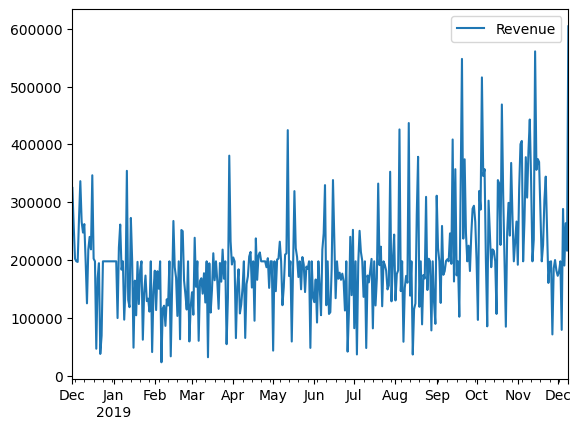

In [ ]:
# plotting all data for all days
ts_df[ts_df.index.min():ts_df.index.max()].plot();

## Question 2.2
We will try to use time series model ARIMA for forecasting the future. you need to find the best model
with different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Absolute Error from 27 choices based on the time
from ”Jan-01-2019” to ”Nov-01-2019” (you might need to split the time series to train and test with grid
search according to the M05B material).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 2.3
There are many deep learning time series forecasting methods, could you please explore those methods and write down the necessary data wrangling and modeling steps (steps on how to achieve, not actual code). Also please give the reference of the deep learning time series forecasting models you are using.